# Pseudo Virtual Fields: Neural Networks act as Taylor expansions to find optimal virtual fields via weak equilibrium minimization

In [ ]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [453]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [454]:
from helper_FEBIO import *
from VF_helper import *
from model import *
from plot_helper import *

In [70]:
import sys
sys.path.insert(0, '../')
from core import *
#config
from config import *
#CUDA
cuda=0
device=initCUDA(cuda)
#supporting files


-----------------------------------------------------
Setting device to:  0
Test:  cuda:0
-----------------------------------------------------



# Read FEBIO data

In [71]:

#Read connectivity
connectivity = pd.read_csv("/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/connectivity")
connectivity

,1,1,9,513,107,44,117,603,368
0,2,9,10,514,513,117,118,604,603
1,3,10,11,515,514,118,119,605,604
2,4,11,12,516,515,119,120,606,605
3,5,12,13,517,516,120,121,607,606
4,6,13,14,518,517,121,122,608,607
...,...,...,...,...,...,...,...,...,...
994,996,1327,1328,354,355,598,599,95,94
995,997,1328,1329,353,354,599,600,96,95
996,998,1329,1330,352,353,600,601,97,96
997,999,1330,1331,351,352,601,602,98,97


### Function to read multiple states from FEBIO file

In [72]:
volume_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/volume"
volume=read_multi_ste_output2(volume_file,p=True) 

Detected 1-field blocks → ['element']
Number of states: 11
 State 1: element=1000
 State 2: element=1000
 State 3: element=1000
 State 4: element=1000
 State 5: element=1000
 State 6: element=1000
 State 7: element=1000
 State 8: element=1000
 State 9: element=1000
 State 10: element=1000
 State 11: element=1000


In [73]:
area_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/area"
area=read_multi_ste_output2(area_file,p=True) 

Detected 1-field blocks → ['element']
Number of states: 11
 State 1: element=600
 State 2: element=600
 State 3: element=600
 State 4: element=600
 State 5: element=600
 State 6: element=600
 State 7: element=600
 State 8: element=600
 State 9: element=600
 State 10: element=600
 State 11: element=600


In [74]:
stress_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/stress"
stress=read_multi_ste_output2(stress_file,p=True)

Detected 6-field blocks → ['xx', 'yy', 'zz', 'xy', 'xz', 'yz']
Number of states: 11
 State 1: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 2: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 3: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 4: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 5: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 6: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 7: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 8: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 9: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 10: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000
 State 11: xx=1000, yy=1000, zz=1000, xy=1000, xz=1000, yz=1000


In [75]:
F_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/F"
F=read_multi_ste_output2(F_file,p=True)

Detected 9-field blocks → ['F11', 'F12', 'F13', 'F21', 'F22', 'F23', 'F31', 'F32', 'F33']
Number of states: 11
 State 1: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 2: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 3: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 4: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 5: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 6: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 7: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 8: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=1000
 State 9: F11=1000, F12=1000, F13=1000, F21=1000, F22=1000, F23=1000, F31=1000, F32=1000, F33=100

In [76]:
surface_normal_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/surface_normal"
surface_normal=read_multi_ste_output2(surface_normal_file,p=True)

Detected 3-field blocks → ['x', 'y', 'z']
Number of states: 11
 State 1: x=600, y=600, z=600
 State 2: x=600, y=600, z=600
 State 3: x=600, y=600, z=600
 State 4: x=600, y=600, z=600
 State 5: x=600, y=600, z=600
 State 6: x=600, y=600, z=600
 State 7: x=600, y=600, z=600
 State 8: x=600, y=600, z=600
 State 9: x=600, y=600, z=600
 State 10: x=600, y=600, z=600
 State 11: x=600, y=600, z=600


In [77]:
position_file="/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/outputs/position"
position=read_multi_ste_output2(position_file,p=True)

Detected 3-field blocks → ['x', 'y', 'z']
Number of states: 11
 State 1: x=1331, y=1331, z=1331
 State 2: x=1331, y=1331, z=1331
 State 3: x=1331, y=1331, z=1331
 State 4: x=1331, y=1331, z=1331
 State 5: x=1331, y=1331, z=1331
 State 6: x=1331, y=1331, z=1331
 State 7: x=1331, y=1331, z=1331
 State 8: x=1331, y=1331, z=1331
 State 9: x=1331, y=1331, z=1331
 State 10: x=1331, y=1331, z=1331
 State 11: x=1331, y=1331, z=1331


### Log file data

In [78]:
#Centroids from log file
centroids_file='/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/Model3.log'
centroids_dict  = parse_states(centroids_file)

#Should get 11 states, each with exactly 1000 x/y/z values:
print("states found:", sorted(centroids_dict.keys()))
for step, d in centroids_dict.items():
    print(f" step {step:2d}: x={len(d['x'])} pts, y={len(d['y'])}, z={len(d['z'])}")

states found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 step  0: x=1000 pts, y=1000, z=1000
 step  1: x=1000 pts, y=1000, z=1000
 step  2: x=1000 pts, y=1000, z=1000
 step  3: x=1000 pts, y=1000, z=1000
 step  4: x=1000 pts, y=1000, z=1000
 step  5: x=1000 pts, y=1000, z=1000
 step  6: x=1000 pts, y=1000, z=1000
 step  7: x=1000 pts, y=1000, z=1000
 step  8: x=1000 pts, y=1000, z=1000
 step  9: x=1000 pts, y=1000, z=1000
 step 10: x=1000 pts, y=1000, z=1000


### State dict to tensor

In [79]:
# 1) Build a (Nelements,3,nstates) tensor for centroids:
centroids_tensor = states_to_tensor(centroids_dict, ['x','y','z'])
print("centroids_tensor.shape:", centroids_tensor.shape)
# → (Nelements, 3, nstates)

# 2) Build a (Nelements,6,nstates) tensor for volume‐stress:
stress_tensor = states_to_tensor(stress,
                                ['xx','yy','zz','xy','xz','yz'])
print("stress_tensor.shape:", stress_tensor.shape)
# → (Nelements, 6, nstates)

# 3) If you just want the x‐only channel across states:
#x_only = states_to_tensor(centroids_dict, ['x'])
#print("x_only.shape:", x_only.shape)
# → (Nelements, 1, nstates)

# 3) Volume:
volume_tensor = states_to_tensor(volume, ['element'])
print("volume_tensor.shape:", volume_tensor.shape)
# → (Nelements, 1, nstates)

# 4) Deformation tensor:
F_tensor = states_to_tensor(F, ['F11','F12','F13','F21','F22','F23','F31','F32','F33'])
print("F_tensor.shape:", F_tensor.shape)

# 4) Surface Normal:
surface_normal_tensor = states_to_tensor(surface_normal, ['x','y','z'])
print("surface_normal_tensor.shape:", surface_normal_tensor.shape)


# 5) Area:
area_tensor = states_to_tensor(area, ['element'])
print("area_tensor.shape:", area_tensor.shape)

centroids_tensor.shape: torch.Size([1000, 3, 11])
stress_tensor.shape: torch.Size([1000, 6, 11])
volume_tensor.shape: torch.Size([1000, 1, 11])
F_tensor.shape: torch.Size([1000, 9, 11])
surface_normal_tensor.shape: torch.Size([600, 3, 11])
area_tensor.shape: torch.Size([600, 1, 11])


In [14]:
Nelements=F_tensor.shape[0]

## Where pressure is applied and Zero Displacement Boundary Conditions

In [ ]:
pressure_nodes = parse_quad4_from_feb("/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/Model3.feb", surface_name="Pressure1")
pressure_node_ids = list(pressure_nodes.keys())

In [81]:
pressure_nodes[1], type(pressure_nodes)

([5, 35, 522, 108], dict)

In [393]:
ZD_nodes = parse_quad4_from_feb("/home/feolalab/Desktop/EUCLID-hyperelasticity-NN/my_data/Cube/jobs/Model3.feb", surface_name="ZeroDisplacement1")
ZD_node_ids = list(ZD_nodes.keys())

In [395]:
ZD_nodes[1], len(ZD_node_ids)

([4, 80, 441, 99], 100)

In [ ]:
connectivity_list = [
    tuple(map(int, row))           # ensure ints
    for row in connectivity.values
]

In [392]:
# 2) Flatten pressure-node dict into a set of node IDs
pressure_nodes_set = {
    n
    for nodes in pressure_nodes.values()
    for n in nodes
}

mapping_element_pressure = map_pressure_to_elements(connectivity_list, pressure_nodes_set)
#print(mapping.keys())
# (3) inspect
for eid, info in mapping_element_pressure.items():
    print(f"Element {eid}:")
    print("  all_nodes:     ", info['all_nodes'])
    print("  pressure_nodes:", info['pressure_nodes'])

Element 901:
  all_nodes:      [36, 189, 1251, 440, 5, 35, 522, 108]
  pressure_nodes: [5, 35, 522, 108]
Element 902:
  all_nodes:      [189, 190, 1252, 1251, 35, 34, 523, 522]
  pressure_nodes: [35, 34, 523, 522]
Element 903:
  all_nodes:      [190, 191, 1253, 1252, 34, 33, 524, 523]
  pressure_nodes: [34, 33, 524, 523]
Element 904:
  all_nodes:      [191, 192, 1254, 1253, 33, 32, 525, 524]
  pressure_nodes: [33, 32, 525, 524]
Element 905:
  all_nodes:      [192, 193, 1255, 1254, 32, 31, 526, 525]
  pressure_nodes: [32, 31, 526, 525]
Element 906:
  all_nodes:      [193, 194, 1256, 1255, 31, 30, 527, 526]
  pressure_nodes: [31, 30, 527, 526]
Element 907:
  all_nodes:      [194, 195, 1257, 1256, 30, 29, 528, 527]
  pressure_nodes: [30, 29, 528, 527]
Element 908:
  all_nodes:      [195, 196, 1258, 1257, 29, 28, 529, 528]
  pressure_nodes: [29, 28, 529, 528]
Element 909:
  all_nodes:      [196, 197, 1259, 1258, 28, 27, 530, 529]
  pressure_nodes: [28, 27, 530, 529]
Element 910:
  all_node

In [399]:
# 2) Flatten pressure-node dict into a set of node IDs
ZD_nodes_set = {
    n
    for nodes in ZD_nodes.values()
    for n in nodes
}

mapping_element_ZD = map_pressure_to_elements(connectivity_list, ZD_nodes_set)
#print(mapping.keys())
# (3) inspect
for eid, info in mapping_element_ZD.items():
    print(f"Element {eid}:")
    print("  all_nodes:     ", info['all_nodes'])
    print("  pressure_nodes:", info['pressure_nodes'])

Element 2:
  all_nodes:      [9, 10, 514, 513, 117, 118, 604, 603]
  pressure_nodes: [9, 10, 514, 513]
Element 3:
  all_nodes:      [10, 11, 515, 514, 118, 119, 605, 604]
  pressure_nodes: [10, 11, 515, 514]
Element 4:
  all_nodes:      [11, 12, 516, 515, 119, 120, 606, 605]
  pressure_nodes: [11, 12, 516, 515]
Element 5:
  all_nodes:      [12, 13, 517, 516, 120, 121, 607, 606]
  pressure_nodes: [12, 13, 517, 516]
Element 6:
  all_nodes:      [13, 14, 518, 517, 121, 122, 608, 607]
  pressure_nodes: [13, 14, 518, 517]
Element 7:
  all_nodes:      [14, 15, 519, 518, 122, 123, 609, 608]
  pressure_nodes: [14, 15, 519, 518]
Element 8:
  all_nodes:      [15, 16, 520, 519, 123, 124, 610, 609]
  pressure_nodes: [15, 16, 520, 519]
Element 9:
  all_nodes:      [16, 17, 521, 520, 124, 125, 611, 610]
  pressure_nodes: [16, 17, 521, 520]
Element 10:
  all_nodes:      [17, 2, 45, 521, 125, 18, 198, 611]
  pressure_nodes: [17, 2, 45, 521]
Element 11:
  all_nodes:      [107, 513, 504, 106, 368, 603, 

In [84]:
pressure_element_IDs=list(mapping_element_pressure.keys())

pressure_element_IDs_final = torch.tensor([nid - 1 for nid in pressure_element_IDs], dtype=torch.long)

#len(pressure_element_IDs_final)

In [406]:
ZD_element_IDs=list(mapping_element_ZD.keys())

ZD_element_IDs_final = torch.tensor([nid - 1 for nid in ZD_element_IDs], dtype=torch.long)

#len(pressure_element_IDs_final)

In [407]:
ZD_element_IDs_final, ZD_element_IDs

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
         37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
         55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
         73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
         91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94

In [408]:

#Get normals of surfaces where pressure is applied
# 1) zero‐based indices for those nodes:
idx = torch.tensor([nid - 1 for nid in pressure_node_ids], dtype=torch.long)
idx_ZD = torch.tensor([nid - 1 for nid in ZD_node_ids], dtype=torch.long)

# 2) index into the first dimension:
#    result has shape (100, 3, 11)
pressure_normals = surface_normal_tensor[idx, :, :]
area_normals = area_tensor[idx, :, :]

#ZD:
ZD_normals = surface_normal_tensor[idx_ZD, :, :]
ZD_areas = area_tensor[idx_ZD, :, :]


print(pressure_normals.shape)  # → torch.Size([100, 3, 11])
print(ZD_normals.shape)  # → torch.Size([100, 3, 11])

torch.Size([100, 3, 11])
torch.Size([100, 3, 11])


In [86]:
#print("VF.shape =", VF.shape)
print("max idx =", max(pressure_element_IDs_final).item())
print("min idx =", min(pressure_element_IDs_final).item())


max idx = 999
min idx = 900


# Architecture

In [468]:
from model import *

model = ICNN3D_global_Taylor(n_input=3,
                n_hidden=[64,64,64],
                n_output=30,
                use_dropout=True,
                dropout_rate=0.2,
                centroids=True)

In [469]:
from torchinfo import summary
model = model.to(device)
summary(model)

Layer (type:depth-idx)                   Param #
ICNN3D_global_Taylor                     --
├─ModuleDict: 1-1                        --
│    └─Linear: 2-1                       448
│    └─convexLinear: 2-2                 4,096
│    └─convexLinear: 2-3                 4,096
│    └─convexLinear: 2-4                 1,920
├─ModuleDict: 1-2                        --
│    └─Linear: 2-5                       448
│    └─Linear: 2-6                       448
│    └─convexLinear: 2-7                 180
├─AdaptiveAvgPool1d: 1-3                 --
Total params: 11,636
Trainable params: 11,636
Non-trainable params: 0

## Training loop

In [470]:
F_tensor.shape, stress_tensor.shape, centroids_tensor.shape

(torch.Size([1000, 9, 11]),
 torch.Size([1000, 6, 11]),
 torch.Size([1000, 3, 11]))

In [471]:
x_input= torch.cat(( F_tensor.to(device),centroids_tensor.to(device)), dim=1)
#x_input= F_tensor.to(device)
x_input.shape

torch.Size([1000, 12, 11])

In [472]:
stress_tensor_3d=Voigt_to_3d(stress_tensor)

In [473]:
model.apply(init_weights)

ICNN3D_global_Taylor(
  (layers): ModuleDict(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): convexLinear()
    (2): convexLinear()
    (3): convexLinear()
  )
  (skip_layers): ModuleDict(
    (1): Linear(in_features=6, out_features=64, bias=True)
    (2): Linear(in_features=6, out_features=64, bias=True)
    (3): convexLinear()
  )
  (global_pooling): AdaptiveAvgPool1d(output_size=1)
)

In [478]:
epoch=200
# Adam with a learning rate:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
#Number of states:
states=x_input.shape[2]
N_pressure_dofs=len(pressure_element_IDs_final)
N_ZD_dofs=len(ZD_element_IDs_final)

for i in range(epoch):
    optimizer.zero_grad()#reset gradients
    loss = torch.zeros((), device=device)    # scalar, same dtype/device
    #Estimate
    for s in range(1,states):
        V_NN=model(x_input[:,:,s]) #This is N elements x12 , output is 30,1

        delta_xyz=calculate_point(centroids_tensor, s) #This is N elements x3

        Vx=construct_VF(V_NN[0:10],delta_xyz)
        Vy=construct_VF(V_NN[10:20],delta_xyz)
        Vz=construct_VF(V_NN[20:30],delta_xyz)

        VF=torch.cat((Vx.unsqueeze(1),Vy.unsqueeze(1),Vz.unsqueeze(1)), dim=1)
        grad_VF= construct_VF_gradients(V_NN, delta_xyz)

        #Strain
        virtual_strain=0.5*(grad_VF+grad_VF.transpose(1,2))

        #Volume integral:
        # element‐wise inner product σ^e : ∇v^e
        integrand = torch.sum(stress_tensor_3d[:,:,:,s] * virtual_strain, dim=(1, 2)) # → shape [N]
       # print(f'Integrand shape: {integrand.shape}')
        W_int = torch.sum(integrand * volume_tensor[:,0,s] )/Nelements
       # print(f'W_int shape: {W_int.shape}')
        #Surface integral
        t_surface=pressure_normals[:,:,s]*10000 #normal times scalar amount tells quantity
     #   print(f'W_int shape: {W_int.shape}')
        dot = (t_surface * VF[pressure_element_IDs_final,:]).sum(dim=1, keepdim=True)  # shape: [100, 1]

        W_ext=torch.sum(dot*area_normals[:,:,s])/N_pressure_dofs

        ## Add ZD term:
        ZD_regularization=torch.sum(VF[ZD_element_IDs_final,:]**2, dim=(0,1))/N_ZD_dofs

        #Loss:
        loss+=(W_int-W_ext)**2+ZD_regularization*0.1

    loss/=states

    if i % 50 == 0:
        W_int_item = W_int.item()
        W_ext_item = W_ext.item()
        ZD_regularization_item= ZD_regularization.item()
        L_item    = loss.item()
        print(
            f"Epoch {i:4d} │ "
            f"W_int (internal work): {W_int_item: .2e} │ "
            f"W_ext (external work): {W_ext_item: .2e} │ "
            f"Zero Displacement term: {ZD_regularization_item: .2e} │ "
            f"Loss: {L_item: .2e}"
        )

    loss.backward()

    optimizer.step()

Epoch    0 │ W_int (internal work):  3.25e+00 │ W_ext (external work):  1.82e+00 │ Zero Displacement term:  8.24e-01 │ Loss:  8.42e-01
Epoch   50 │ W_int (internal work):  2.82e+00 │ W_ext (external work):  1.59e+00 │ Zero Displacement term:  7.03e-01 │ Loss:  6.40e-01
Epoch  100 │ W_int (internal work):  2.38e+00 │ W_ext (external work):  1.35e+00 │ Zero Displacement term:  5.84e-01 │ Loss:  4.55e-01
Epoch  150 │ W_int (internal work):  1.99e+00 │ W_ext (external work):  1.11e+00 │ Zero Displacement term:  4.85e-01 │ Loss:  3.24e-01


In [484]:
print_vf_equations(V_NN, fmt="{:+.3f}")

Vx(x,y,z) = +0.027*1 + +0.005*x + +1.387*y + +0.100*z + +1.537*x**2 + +0.048*x*y + +0.097*x*z + +0.065*y**2 + +0.004*y*z + +3.362*z**2
Vy(x,y,z) = +0.074*1 + +0.064*x + +1.078*y + +0.073*z + +0.078*x**2 + +0.065*x*y + +0.108*x*z + +1.972*y**2 + +0.636*y*z + +1.989*z**2
Vz(x,y,z) = +0.066*1 + +0.066*x + +0.072*y + +0.022*z + +0.064*x**2 + +0.077*x*y + +0.024*x*z + +1.154*y**2 + +0.075*y*z + +0.087*z**2


## Visualize

In [485]:
x_input.shape

torch.Size([1000, 12, 11])

In [486]:
model.eval()
time_idx=10

V_NN=model(x_input[:,:,time_idx]) #This is N elements x9 

delta_xyz=calculate_point(centroids_tensor, time_idx) #This is N elements x3

Vx=construct_VF(V_NN[0:10],delta_xyz)  #N,1
Vy=construct_VF(V_NN[10:20],delta_xyz) #N,1
Vz=construct_VF(V_NN[20:30],delta_xyz) #N,1

VF=torch.cat((Vx.unsqueeze(1),Vy.unsqueeze(1),Vz.unsqueeze(1)), dim=1)

In [487]:
X.shape, x.shape, Vx.shape #, M.shape

((100, 100, 100), (1000,), torch.Size([1000]))

### Visualization of VF in a python mesh

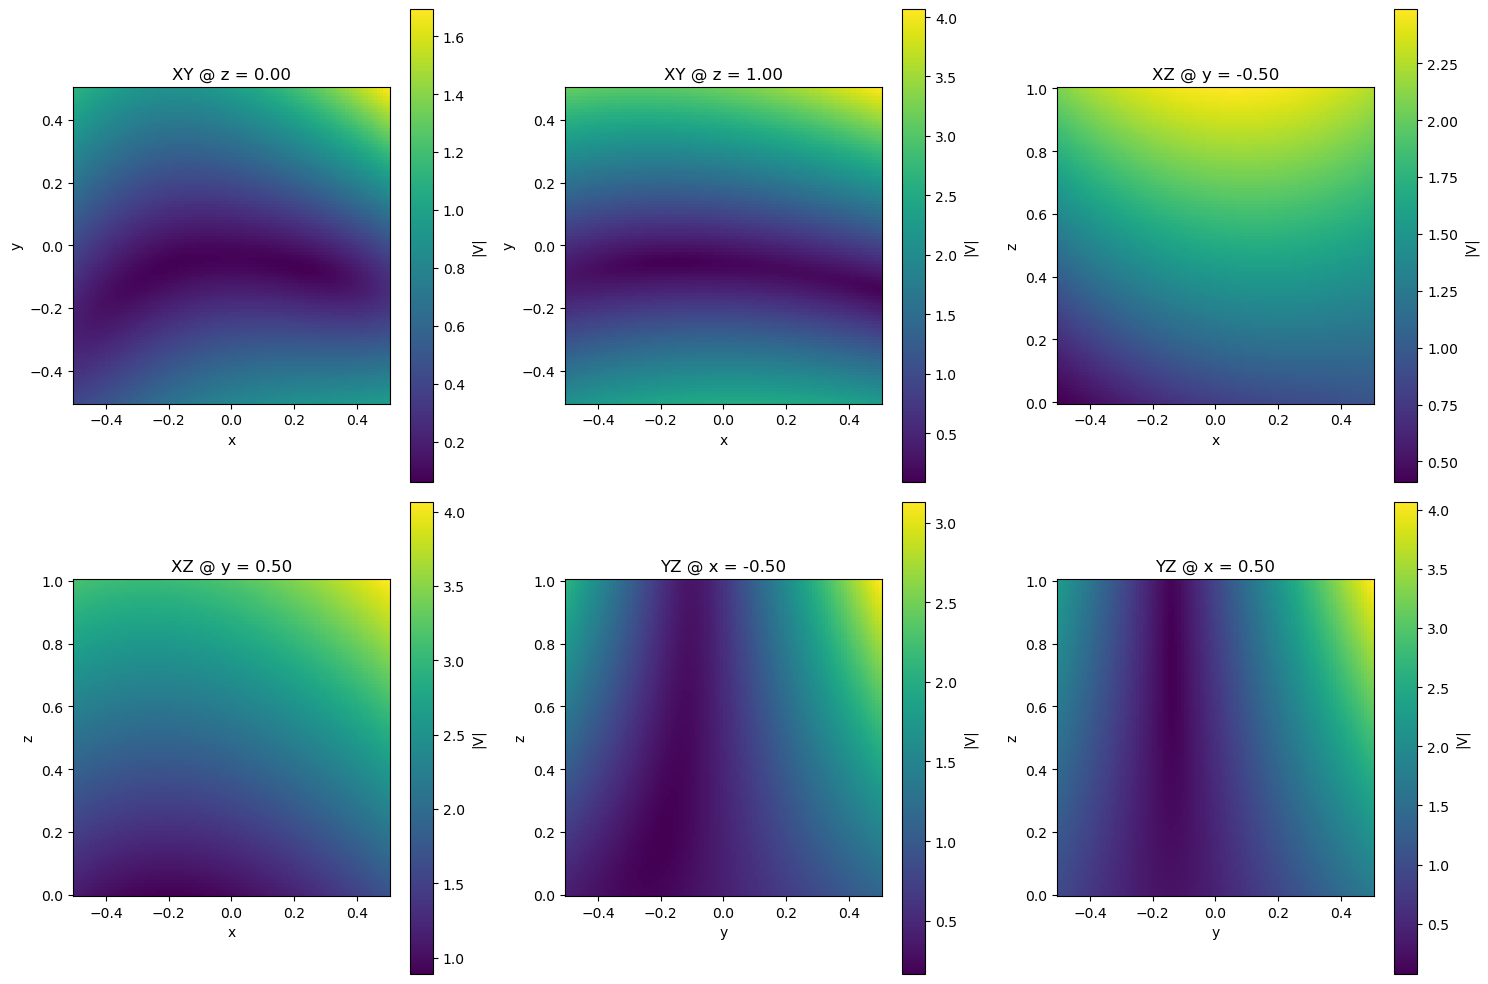

In [492]:
#Visualizing magnitudes
n  = 100
xs = np.linspace(-0.5,  0.5, n)   # x from -0.5 to 0.5
ys = np.linspace(-0.5,  0.5, n)   # y from -0.5 to 0.5
zs = np.linspace( 0.0,  1.0, n)   # z from  0.0 to 1.0

# Make 3D meshgrids: shapes all (n, n, n)
X, Y, Z = np.meshgrid(xs, ys, zs, indexing='xy')

# --- 2) Compute the virtual field on that grid ---
#    You already have V_NN of length 30 (10 coeffs each for Vx,Vy,Vz)
#    and a function taylor3(x,y,z, coeffs) that returns shape (n,n,n)
Vx = taylor3(X, Y, Z, V_NN[:10,0])
Vy = taylor3(X, Y, Z, V_NN[10:20,0])
Vz = taylor3(X, Y, Z, V_NN[20:30,0])

# Here we’ll plot the magnitude, but you could do Vx, Vy or Vz instead:
M = np.sqrt(Vx**2 + Vy**2 + Vz**2)   # → shape (n,n,n)

# --- 4) Call it and show ---
fig, axes = plot_cube_faces(M, X, Y, Z)
plt.show()


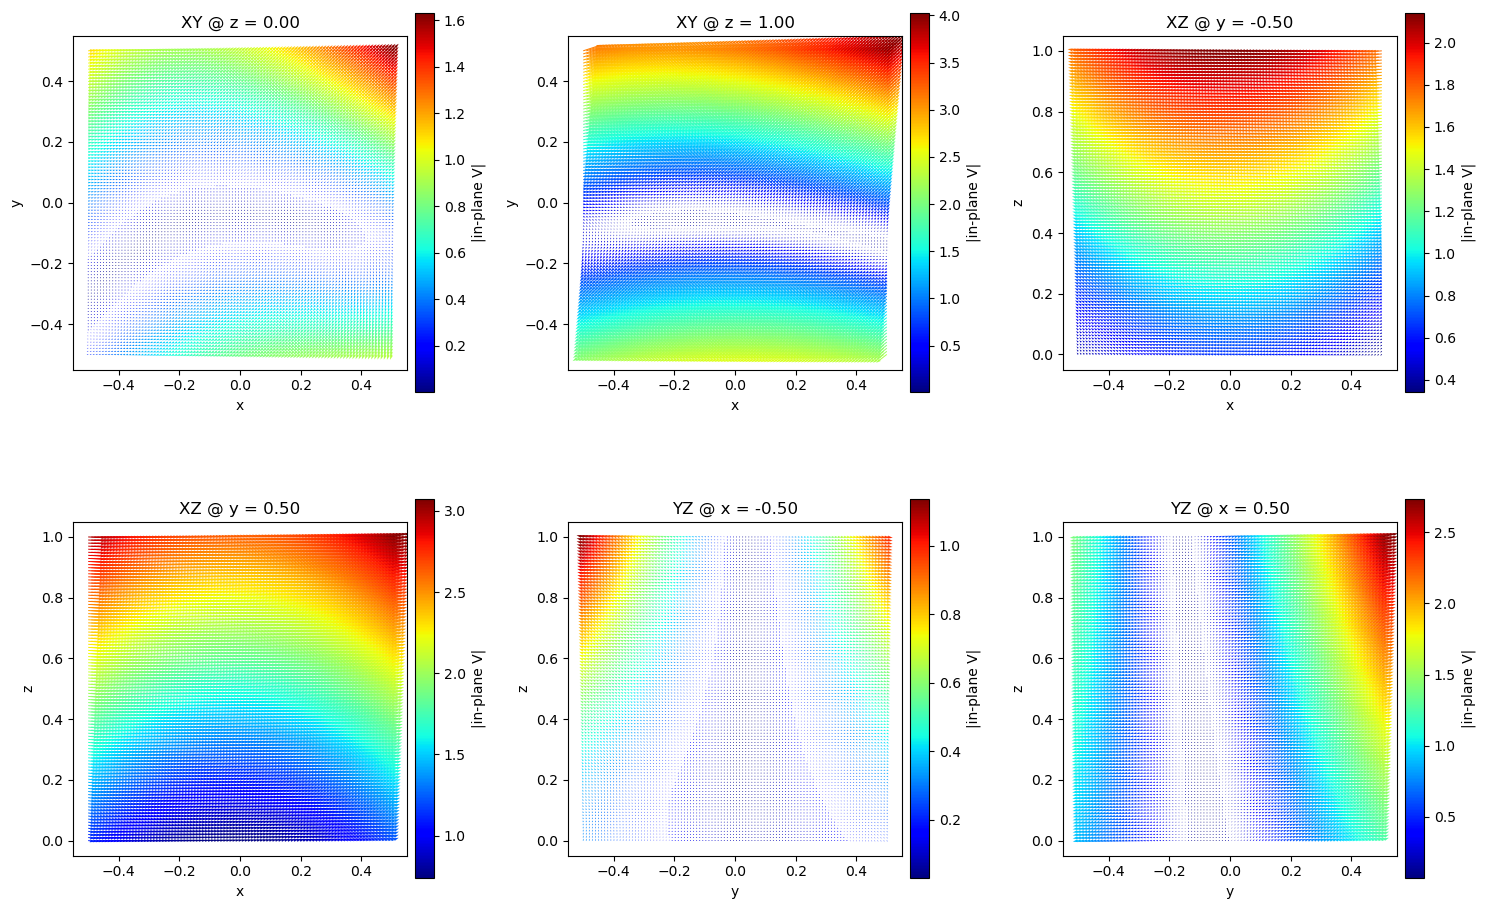

In [489]:
# If Quiver wanted
fig, axes = plot_cube_face_quivers(X, Y, Z, Vx, Vy, Vz, scale=50, width=0.003, cmap='jet')
plt.show()

## Viz in centroids

In [518]:
import plotly.graph_objects as go
# 1) sample a coarse 3D grid
n = 50  # for speed; increase if you like
xs = ys = zs = np.linspace(0, 1, n)
X, Y, Z = np.meshgrid(xs, ys, zs, indexing='xy')
Vx=taylor3(X, Y, Z, V_NN[:10,0])
Vy=taylor3(X, Y, Z, V_NN[10:20,0])
Vz=taylor3(X, Y, Z, V_NN[20:30,0])

M = np.sqrt(Vx**2 + Vy**2 + Vz**2)
# build a list of Surface traces for each face
surfaces = []

# z = 0 and z = 1
for k, z_idx in enumerate([0, -1]):
    surfaces.append(go.Surface(
        x=X[:,:,z_idx], y=Y[:,:,z_idx], z=Z[:,:,z_idx],
        surfacecolor=M[:,:,z_idx],
        colorscale='Viridis', cmin=M.min(), cmax=M.max(),
        showscale=(k==0)  # show colorbar only once
    ))

# y = 0, y = 1
for y_idx in [0, -1]:
    surfaces.append(go.Surface(
        x=X[:,y_idx,:], y=Y[:,y_idx,:], z=Z[:,y_idx,:],
        surfacecolor=M[:,y_idx,:],
        colorscale='Viridis', showscale=False
    ))

# x = 0, x = 1
for x_idx in [0, -1]:
    surfaces.append(go.Surface(
        x=X[x_idx,:,:], y=Y[x_idx,:,:], z=Z[x_idx,:,:],
        surfacecolor=M[x_idx,:,:],
        colorscale='Viridis', showscale=False
    ))

fig = go.Figure(data=surfaces)
fig.update_layout(
    width=700, height=700,
    scene=dict(
        xaxis=dict(range=[0,1]), yaxis=dict(range=[0,1]), zaxis=dict(range=[0,1]),
        aspectmode='cube'
    ),
    title='Interactive cube-face visualization of |V|'
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed